#  Chapter 5: Basic Data Cleaning

---

##  Why is Data Cleaning Important?

- Data cleaning is a **critical first step** in any machine learning project.
- Even **simple errors** like columns with a single value or duplicate rows can:
  - Break your models
  - Lead to **misleading accuracy or performance**
- These steps are **basic but essential** and should never be skipped.

---

## 1️⃣ Columns with a Single Value

- These are called **zero-variance predictors**.
- Every row has the **same value** in such columns → No useful information.
- Should be **removed** as they add no variance and can cause model errors.

---

## 2️⃣ Columns with Very Few Unique Values

- Called **near-zero variance predictors**.
- They have **very limited variability**, which might not be useful for modeling.
- Could still be informative, so handle with care:
  - Consider encoding as **categorical**
  - Try removing one by one and compare model performance

---

## 3️⃣ Low Variance Columns

- Variance measures how much values **spread out** from the mean.
- Columns with **very low variance** can be filtered out.
- `VarianceThreshold` in `scikit-learn` is commonly used to remove such features.

---

## 4️⃣ Duplicate Rows

- Duplicate observations can:
  - **Mislead model evaluation** (e.g. same row in both train/test)
  - **Bias probability estimates** in classifiers
- Should be **detected** and **removed** using `.duplicated()` and `.drop_duplicates()`.

---

##  Important Notes

- Always **visualize and investigate** before removing any data.
- Don’t remove rows or columns blindly — understand **why** the anomaly exists.
- Consider using **domain knowledge** when deciding whether to remove or keep.

---

##  Summary

- Always check for:
  - Columns with only **one unique value**.
  - Columns with **very few unique values** (near-zero variance).
  - Columns with **low overall variance**.
  - **Duplicate rows** in your dataset.
- These cleaning steps help ensure your model is trained on **reliable and diverse data**.




### Identify Columns That Contain a Single Value

In [2]:
# unique values finding method-1
#summarize the number of unique values for each column using numpy
from numpy import unique
import pandas

#read dataset
dataframe = pandas.read_csv("oil-spill.csv", header=None)
data = dataframe.values

# summarize the number of unique values in each column
for i in range(data.shape[1]):
    print(i, len(unique(data[:, i])))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


In [4]:
# unique values finding method-2
#summarize the number of unique values for each column using numpy
from pandas import read_csv
# load the dataset
df = read_csv('oil-spill.csv', header=None)
# summarize the number of unique values in each column
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


### Delete Columns That Contain a Single Value

In [10]:
# delete columns with a single unique value

from pandas import read_csv
# load the dataset
df = read_csv('oil-spill.csv', header=None)
print(df.shape)

# get number of unique values for each column
counts = df.nunique()

#print(counts)

# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)

# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[22]
(937, 49)


### Consider Columns That Have Very Few Values

In [13]:
#summarize the percentage of unique values for each column using numpy
from numpy import unique
import pandas

#read dataset
dataframe = pandas.read_csv("oil-spill.csv", header=None)
data = dataframe.values

# summarize the number of unique values in each column
for i in range(data.shape[1]):
    num = len(unique(data[:, i]))
    percentage = float(num) / data.shape[0] * 100
    print('%d, %d, %.1f%%' % (i, num, percentage))

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


In [17]:
#summarize the percentage of unique values for each column using numpy
from numpy import unique
import pandas

dataframe = pandas.read_csv("oil-spill.csv", header=None)
data = dataframe.values

#summarize the number of unique values in each column
for i in range(data.shape[1]):
    num = len(unique(data[:, i]))
    percentage = float(num) / data.shape[0] * 100
    if percentage < 1:
        print('%d, %d, %.1f%%' % (i, num, percentage))

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


In [19]:
#delete columns where number of unique values is less than 1% of the rows
from numpy import unique
import pandas

#read dataset
dataframe = pandas.read_csv("oil-spill.csv", header=None)
data = dataframe.values
print(df.shape)

# get number of unique values for each column
counts = df.nunique()

# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
print(to_del)

# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 49)
[21, 23, 24, 25, 31, 35, 37, 38, 44, 48]
(937, 39)


## Remove Columns That Have A Low Variance

In [57]:
# Example of applying the variance threshold for feature selection
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold

# Load the dataset
df = read_csv('oil-spill.csv', header=None)

# Split data into inputs and outputs
data = df.values
X = data[:, :-1]  # All columns except the last one (features)
y = data[:, -1]   # Last column (target)
print("Original shape:", X.shape, y.shape)

# Define the transform
transform = VarianceThreshold(threshold=0.0)  # Default threshold removes columns with zero variance

# Transform the input data
X_sel = transform.fit_transform(X)
print("Shape after VarianceThreshold:", X_sel.shape)

Original shape: (937, 49) (937,)
Shape after VarianceThreshold: (937, 48)


Original shape: (937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


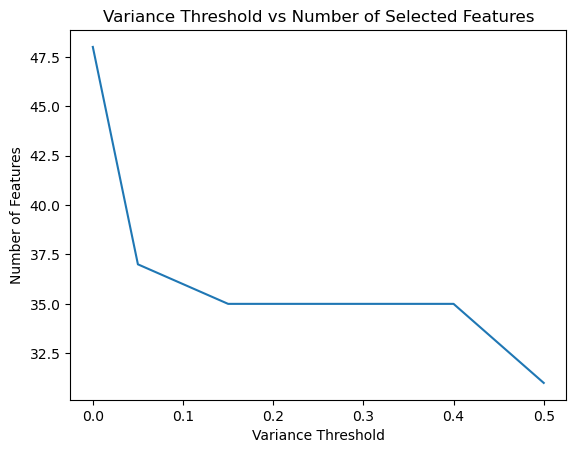

In [63]:
# Explore the effect of variance thresholds on the number of selected features
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt

# Load the dataset
df = read_csv('oil-spill.csv', header=None)

# Split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print("Original shape:", X.shape, y.shape)

# Define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
results = []

# Apply transform with each threshold
for t in thresholds:
    transform = VarianceThreshold(threshold=t)
    X_sel = transform.fit_transform(X)
    n_features = X_sel.shape[1]
    print(f'>Threshold={t:.2f}, Features={n_features}')
    results.append(n_features)

# Plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.xlabel('Variance Threshold')
plt.ylabel('Number of Features')
plt.title('Variance Threshold vs Number of Selected Features')
plt.show()

## Identify Rows That Contain Duplicate Data

### IRIS DATASET

In [38]:
#locate rows of duplicate data
from pandas import read_csv

# load the dataset
df = read_csv('IRIS.csv', header=None)

# calculate duplicates
dups = df.duplicated()

print(dups)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [42]:
# report if there are any duplicates
print(dups.any())

True


In [44]:
# list all duplicate rows
print(df[dups])

       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


### Delete Rows That Contain Duplicate Data

In [36]:
#delete rows of duplicate data from the dataset
from pandas import read_csv

# load the dataset
df = read_csv('IRIS.csv', header=None)
print(df.shape)

# delete duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

(150, 5)
(147, 5)
